<a href="https://colab.research.google.com/github/angelina6k/NM/blob/main/%D0%9B%D1%8013_%D0%9A%D0%B0%D0%BB%D1%96%D0%BD%D1%96%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

x = [1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 
y = [2.1    2.2551 2.4116 2.5694 2.7281 2.8877 3.0481 3.2093 3.3714 3.5347
 3.6995]


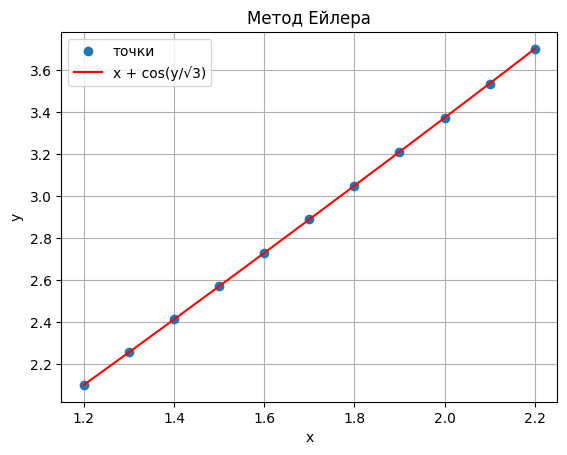

In [16]:
#Метод Ейлера

import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y / np.sqrt(3))

a, b, h, y0 = 1.2, 2.2, 0.1, 2.1
# ------------------

if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h)

x = np.array([a + i*h for i in range(n + 1)])
y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

# ЗАМЕНА: np.round_ -> np.round
y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x + cos(y/√3)"])
plt.grid()
plt.show()



In [ ]:
#Додати перевірку odeint для першого завдання


In [ ]:
#додати перевірку solve_ivp для перешого завдання

#Метод Ейлера-Коші

x = [0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 
y = [1.3    1.4677 1.6516 1.8508 2.0638 2.2884 2.5223 2.7626 3.0065 3.2513
 3.4946]


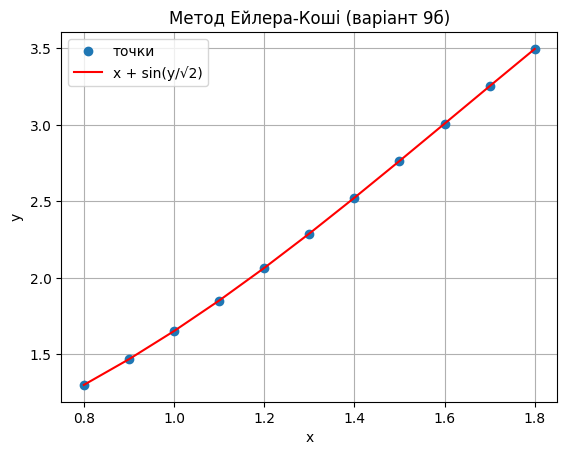

In [15]:
#Метод Ейлера-Коші

import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y / np.sqrt(2))

a = 0.8  # ліва межа відрізку
b = 1.8  # права межа відрізку
h = 0.1  # крок
y0 = 1.3  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

# ЗАМЕНА: np.round_ -> np.round
y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші (варіант 9б)")
plt.legend(["точки", "x + sin(y/√2)"])
plt.grid()
plt.show()





#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3]
y= [2.1        2.25582368 2.41294105 2.57110528 2.73015222 2.88999988
 3.05064668 3.21216885 3.3747178  3.53851781 3.70386456 3.87112482]


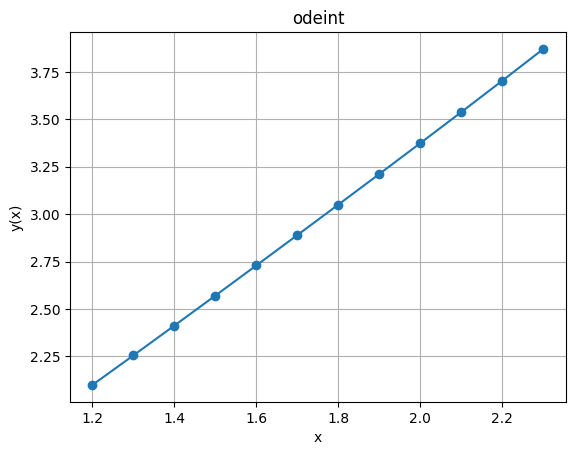

In [9]:
# odeint — варіант 9а

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(y, x):
    return x + np.cos(y / np.sqrt(3))

y0 = 2.1
x = np.arange(1.2, 2.2 + 0.1, 0.1)

y = odeint(model, y0, x)

print('x=', x)
print('y=', y.flatten())

plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('odeint')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8]
y= [1.3    1.4679 1.6523 1.8521 2.0653 2.2898 2.5233 2.7634 3.0075 3.2529
 3.4967]


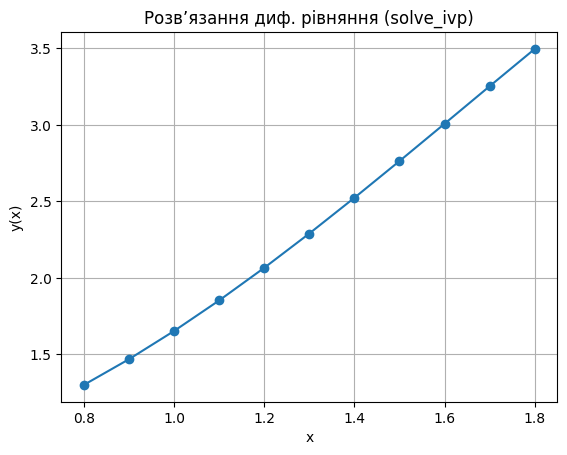

In [7]:
#Використання scipy.integrate.solve_ivp — варіант 9б

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx у форматі (t, y)
def model(t, y):
    return t + np.sin(y / np.sqrt(2))

# Початкова умова
y0 = [1.3]  # Потрібно передати як список

# Значення x (точки в яких робимо оцінку)
x = np.linspace(0.8, 1.8, 11)  # від 0.8 до 1.8 включно, 11 точок (h=0.1)

# Розв'язання ODE
sol = solve_ivp(model, [0.8, 1.8], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', np.round(sol.y[0], 4))

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння (solve_ivp)')
plt.grid()
plt.show()
